In [ ]:
import pandas as pd
import numpy as np

colnames = ["S_Mean", "S_Max-Min", "S_Max-|Min|", "S_sumYup - sumYdn", "S_(Max-Mean)/(Mean-Min))", "S_numYup - numYdn", 
            "S_maxBd", "S_RangeJDy", "S_F", 
            "L_Mean", "L_Max-Min", "L_Max-|Min|", "L_sumYup - sumYdn", "L_(Max-Mean)/(Mean-Min))", "L_numYup - numYdn", 
            "L_maxBd", "L_RangeJDy", "L_F", "L_Ph",
            "y"]
phase_colnames = []
abs_colnames = []
imag_colnames = []
real_colnames = []
for f_name in colnames:
    phase_colnames.append(f_name + "_phase")
    abs_colnames.append(f_name + "_abs")
    real_colnames.append(f_name + "_real")
    imag_colnames.append(f_name + "_imag")

print(len(abs_colnames))
print(len(phase_colnames))
#data_phase = pd.read_csv('COMP_PHASE_difference_10_devices_802_11_a_L_STF_LTF_dataset_Hyp1.txt', sep=",", names=phase_colnames, header=None)
data_abs = pd.read_csv('Multipath_dataset_ABS_no_CFO_comp.txt', sep=",", names=abs_colnames, header=None)
#data_real = pd.read_csv('REAL_difference_10_devices_802_11_a_L_STF_LTF_dataset_Hyp1.txt', sep=",", names=real_colnames, header=None)
#data_imag = pd.read_csv('IMAG_difference_10_devices_802_11_a_L_STF_LTF_dataset_Hyp1.txt', sep=",", names=imag_colnames, header=None)
data_angle = pd.read_csv('Multipath_dataset_PHASE_no_CFO_comp.txt', sep=",", names=phase_colnames, header=None)

data_abs.reset_index(drop=True, inplace=True)
data_angle.reset_index(drop=True, inplace=True)

#data = pd.concat([data_abs, data_angle], axis=1)
data = pd.concat([data_abs.drop("y_abs", axis=1), data_angle], axis=1)

#data = data.drop(["S_H_abs", "S_A_abs", "S_B_abs", "L_H_abs", "L_A_abs", "L_B_abs", "S_H_phase",
#                 "S_A_phase", "S_B_phase", "L_H_phase", "L_A_phase", "L_B_phase", "S_Mean_phase", "L_Mean_phase"], axis=1)



data = data.replace([np.inf, -np.inf, np.nan], 0)

data.reset_index()

data.info()

In [1]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [2]:
help(KMeans)
kmeans.labels_


Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

In [1]:
import numpy as np
import matplotlib.pyplot as plt

params = [[[ 0,1],  [ 0,1]], 
          [[ 5,1],  [ 5,1]], 
          [[-2,5],  [ 2,5]],
          [[ 2,1],  [ 2,1]],
          [[-5,1],  [-5,1]]]

n = 300
dims = len(params[0])

data = []
y = []
for ix, i in enumerate(params):
    inst = np.random.randn(n, dims)
    for dim in range(dims):
        inst[:,dim] = params[ix][dim][0]+params[ix][dim][1]*inst[:,dim]
        label = ix + np.zeros(n)

    if len(data) == 0: data = inst
    else: data = np.append( data, inst, axis= 0)
    if len(y) == 0: y = label
    else: y = np.append(y, label)

num_clusters = len(params)

print(y.shape)
print(data.shape)

(1500,)
(1500, 2)


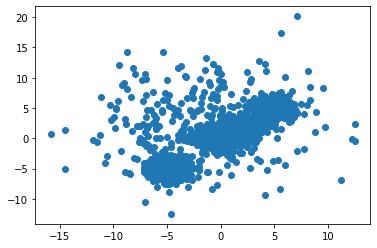

In [2]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [3]:
class Kmeans(object):

    def __init__(self, k=1):
        self.k = k

    def train(self, data, verbose=1):

        shape = data.shape

        ranges = np.zeros((shape[1], 2))
        centroids = np.zeros((shape[1], 2))

        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])

        if verbose == 1:
            print('Ranges: ')
            print(ranges)

        centroids = np.zeros((self.k, shape[1]))
        for i in range(self.k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)

        if verbose == 1:
            print('Centroids: ')
            print(centroids)

            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()

        count = 0
        while count < 100:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)

            distances = np.zeros((shape[0],self.k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))

            labels = np.argmin(distances, axis = 1)

            new_centroids = np.zeros((self.k, shape[1]))
            for centroid in range(self.k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])

            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()

            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                break

            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1

    def getAverageDistance(self, data):

        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists

    def getLabels(self):
        return self.labels

Ranges: 
[[-15.8609895   12.51804758]
 [-12.47468449  20.13243888]]
Centroids: 
[[ 2.43656285 17.66009862]
 [-4.44695173 15.55803849]
 [-5.27182855 -8.86437402]
 [-6.16653428 14.65660484]
 [-0.87917771 -9.47422757]]


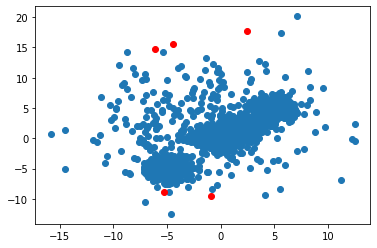

-----------------------------------------------
Iteration:  1


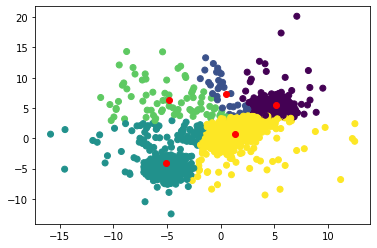

-----------------------------------------------
Iteration:  2


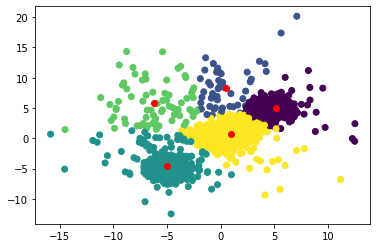

-----------------------------------------------
Iteration:  3


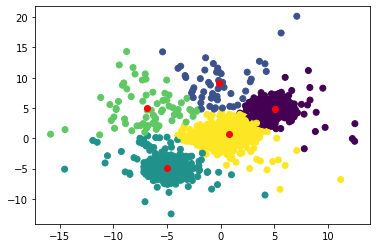

-----------------------------------------------
Iteration:  4


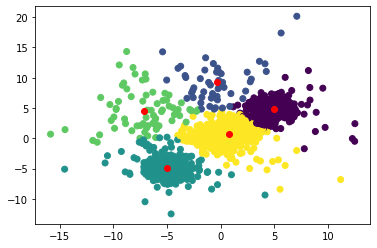

-----------------------------------------------
Iteration:  5


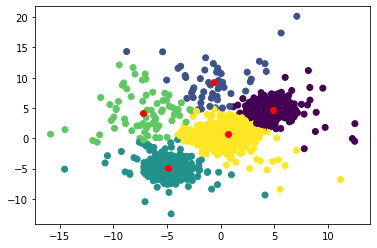

-----------------------------------------------
Iteration:  6


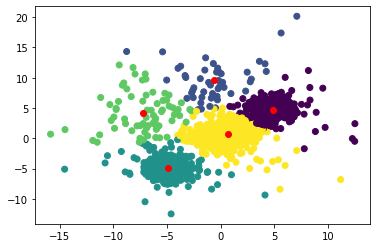

-----------------------------------------------
Iteration:  7


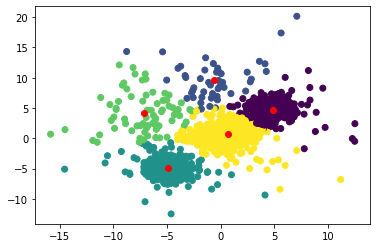

-----------------------------------------------
Iteration:  8


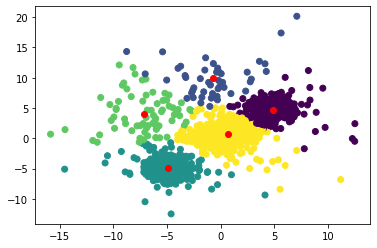

-----------------------------------------------
Iteration:  9


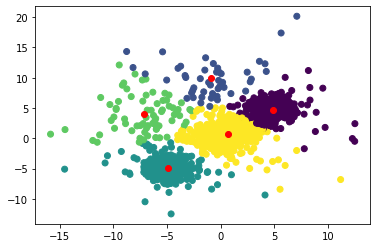

-----------------------------------------------
Iteration:  10


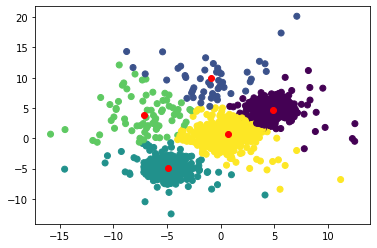

-----------------------------------------------
Iteration:  11


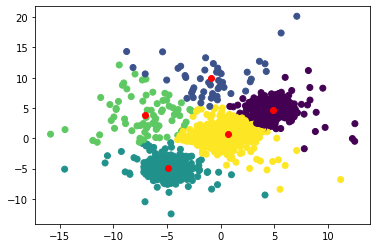

-----------------------------------------------
Iteration:  12


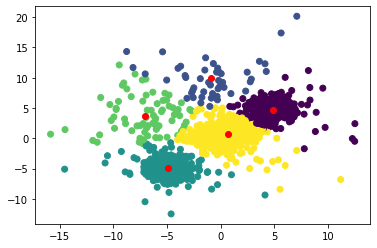

-----------------------------------------------
Iteration:  13


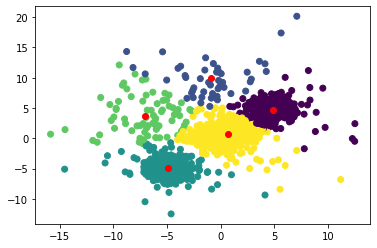

DONE!
[4 4 4 ... 2 2 2]
[[ 4.87441595  4.7163641 ]
 [-0.91043028  9.9016262 ]
 [-4.94145249 -4.97921308]
 [-7.01063892  3.75904751]
 [ 0.72616764  0.6811904 ]]


1

In [4]:
kmeans = Kmeans(5)
kmeans.train(data)

In [ ]:
import scipy
